In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
# List of CSV files to plot
# /home/mrudolph/documents/fuzzrl/rl_train/logs/ppo/FuzzGym-v0_1


(58, 58)
(52, 52)
(46, 46)
(40, 40)
(34, 34)
(28, 28)


Text(0.5, 0.98, 'Bitmap Progression in an Episode')

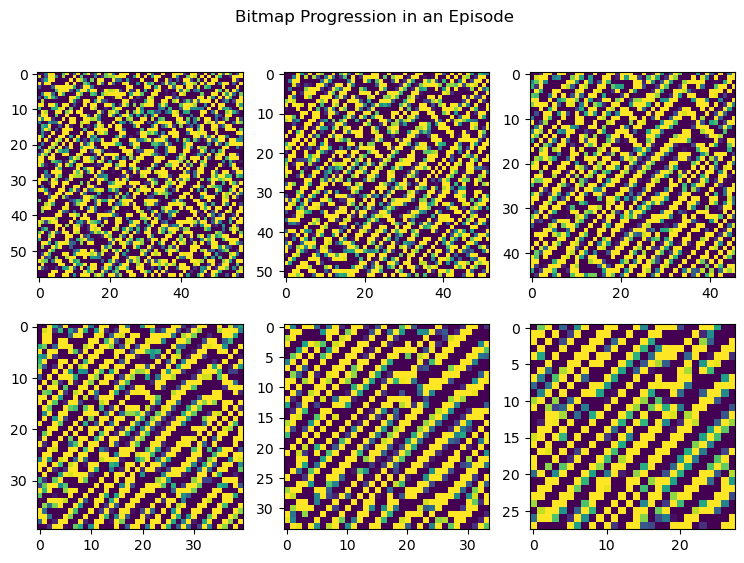

In [31]:
img = np.random.randint(0,255, size=(64,64))
a = np.array([-0.2508476 , -0.14985313, -1.,-0.02152683,  0.15025266,  1.,-1., 1., 1. ]).reshape((3,3))



k = 3
l = 2

plt.rcParams['figure.figsize'] = [k * 3, l * 3]
# Create a figure with 2 subplots

fig, axs = plt.subplots(l,k)


for i in range(l):
    for j in range(k):
        for loop in range(3):
            img = scipy.signal.convolve2d(img, a,mode='valid')
            img = np.clip(img, 0, 255)
        print(img.shape)
        axs[i,j].imshow(img)
        
fig.suptitle('Bitmap Progression in an Episode')
        
    
    


In [39]:
k = 11
files = [f'/home/mrudolph/documents/fuzzrl/rl_train/logs/ppo/FuzzGym-v0_{k}/{i}.monitor.csv' for i in range(1)]
files

['/home/mrudolph/documents/fuzzrl/rl_train/logs/ppo/FuzzGym-v0_11/0.monitor.csv']

<Axes: xlabel='t', ylabel='rew'>

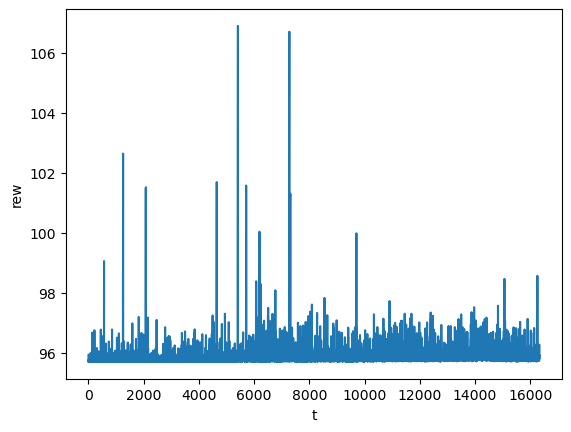

In [40]:
# Create a figure to plot on

df0 = pd.read_csv(files[0], skiprows=1)
# Loop over CSV files and plot r vs t on the same figure
results = np.zeros((df0.shape[0], 4))
results_list = []
d = {}
r_list = []
run_list = []
t_list = []
for i, file in enumerate(files):
    # Load CSV file into a pandas dataframe, skipping the first row
    df = pd.read_csv(file, skiprows=1)
    ll = df['r'].values.shape[0]
    r_list.extend(df['r'].values.tolist())
    run_list.extend([i] * ll)
    t_list.extend(df['t'].values.tolist())
    results[:,i] = df['r'].values

    
d = {'rew': r_list, 'id': run_list, 't': t_list}
df_all = pd.DataFrame(data=d)

sns.lineplot(data=df_all, x="t", y="rew")

<Axes: xlabel='t', ylabel='rew'>

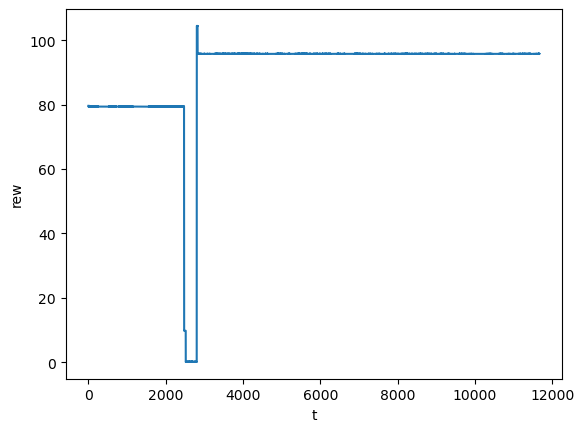